# SarXarray Demo Notebook

In this Jupyter Notebook, we demonstrate the following operations using `sarxarray`:

- Load an SLC stack in binary format into a `xarray.Dataset` object;
- Append variable data fields;
- Create an MRM of a subset of the SLC stack;
- Apply point selection to a subset of the SLC stack;
- Export the selection results in Zarr format

The data needed for this Notebook is sored in the following pth on Spider: `/project/caroline/Public/demo_sarxarray`.

In [2]:
!pip install ../.

Processing /project/caroline/Share/users/caroline-pchandramouli/sarxarray
  Preparing metadata (setup.py) ... done
  Using cached xarray-2023.1.0-py3-none-any.whl (973 kB)
  Using cached zarr-2.13.6-py3-none-any.whl (193 kB)
  Using cached asciitree-0.3.3.tar.gz (4.0 kB)
  Preparing metadata (setup.py) ... done
  Using cached fasteners-0.18-py3-none-any.whl (18 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 8.3 MB/s eta 0:00:0000:01:00:01
  Created wheel for sarxarray: filename=sarxarray-0.1.0-py3-none-any.whl size=10753 sha256=5a891d197a8214ed2d2eac650e29343191ef1612482c11079a6851ce67b3e2c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-72ske2m0/wheels/31/1d/37/2fcaa491e105eb807112516148a09c13c38e8e380827726880
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5032 sha256=d78be05c2450c0d2743bbad4fea55846be101eb13c5de783f0beab73d874e313
  Stored in directory: /home/caroline-pchandramouli/.cache/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1

In [16]:
# To execute this notebook, you may need to install matplotlib
# For example, execute this block to install matplotlib into "sarxarray" environment
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.3 MB/s eta 0:00:00


In [3]:
import numpy as np
from pathlib import Path
import sarxarray

### Load a SLC stack

In [4]:
# You many need to change this cell to your local data directory
# path = Path('../../data/nl_veenweiden_s1_asc_t088/')
path = Path('/project/caroline//Share/stacks/nl_veenweiden_s1_asc_t088/stack')

In [5]:
# Make a list of SLCs to read
f_slc = 'cint.raw' 
list_slcs = [p/f_slc for p in path.rglob(('[0-9]' * 8)) if not p.match('20200325')] # cint for master is missing
# list_slcs

In [6]:
len(list_slcs)

374

In [9]:
# Read metadata
shape=(10018, 68656)
dtype = np.dtype([('re', np.float32), ('im', np.float32)])

In [10]:
stack = sarxarray.from_binary(list_slcs, shape, dtype=dtype)
stack

<xarray.Dataset>
Dimensions:    (azimuth: 10018, range: 68656, time: 374)
Coordinates:
  * azimuth    (azimuth) int64 0 1 2 3 4 5 ... 10013 10014 10015 10016 10017
  * range      (range) int64 0 1 2 3 4 5 ... 68650 68651 68652 68653 68654 68655
  * time       (time) int64 0 1 2 3 4 5 6 7 ... 366 367 368 369 370 371 372 373
Data variables:
    complex    (azimuth, range, time) complex64 dask.array<chunksize=(4000, 4000, 1), meta=np.ndarray>
    amplitude  (azimuth, range, time) float32 dask.array<chunksize=(4000, 4000, 1), meta=np.ndarray>
    phase      (azimuth, range, time) float32 dask.array<chunksize=(4000, 4000, 1), meta=np.ndarray>

In [11]:
stack.complex

<xarray.DataArray 'complex' (azimuth: 10018, range: 68656, time: 374)>
dask.array<transpose, shape=(10018, 68656, 374), dtype=complex64, chunksize=(4000, 4000, 1), chunktype=numpy.ndarray>
Coordinates:
  * azimuth  (azimuth) int64 0 1 2 3 4 5 ... 10012 10013 10014 10015 10016 10017
  * range    (range) int64 0 1 2 3 4 5 6 ... 68650 68651 68652 68653 68654 68655
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 366 367 368 369 370 371 372 373

### Create MRM of a subset

Here you can use the dask plugin on the left side of your Jupyter panel, and spin up workers

In [12]:
from dask.distributed import Client

client = Client("tcp://10.0.4.11:37383")
client

<Client: 'tcp://10.0.4.11:37383' processes=4 threads=16, memory=120.00 GiB>

In [13]:
mrm = stack.slcstack.mrm()
mrm

<xarray.DataArray 'amplitude' (azimuth: 10018, range: 68656)>
dask.array<mean_agg-aggregate, shape=(10018, 68656), dtype=float32, chunksize=(4000, 4000), chunktype=numpy.ndarray>
Coordinates:
  * azimuth  (azimuth) int64 0 1 2 3 4 5 ... 10012 10013 10014 10015 10016 10017
  * range    (range) int64 0 1 2 3 4 5 6 ... 68650 68651 68652 68653 68654 68655

In [14]:
# Compute a subset of the mrm
mrm_subset = mrm[5000:5100, 10000:10100]
mrm_subset = mrm_subset.compute()

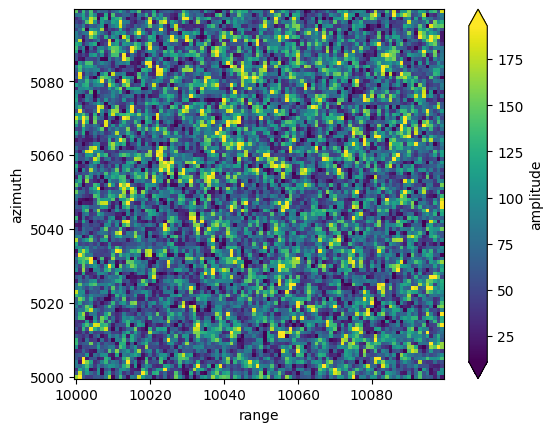

In [17]:
# Visualize
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.imshow(mrm_subset)
mrm_subset.plot(robust=True, ax=ax)